In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import math
import scipy.stats as stats
import datetime

In [96]:
nrows = 70
ncols = 4

np.random.seed(27)
f1 = lambda x: 0.000016*(x-170)**3-0.0003*(x-400)**2-0.5*x+250 #f2 = lambda x: 0.000012*(x-180)**3-0.0006*(x-200)**2-0.26*x+270

s1 = pd.Series(data=np.random.normal(loc=100, scale=20, size=nrows), index=pd.date_range(start='2021-1-4', periods=nrows), name='process S1')
s2 = pd.Series(data=np.random.normal(loc=100, scale=20, size=nrows), index=np.arange(0, nrows), name='process S2')
s3 = pd.Series(data=np.random.normal(loc=100, scale=20, size=16*60), index=pd.date_range(start='06:00', periods=16*60, freq='1 min'), name='process S3')
series = pd.Series(data=np.array(list(map(f1, np.arange(0, nrows)))) + (np.random.weibull(7,nrows) * 100), index=pd.date_range(start='2021-1-4', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='2021-1-4', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

series[series.sample(frac=0.1).index] = np.nan # break the series
for col in frame.columns:
    frame.at[frame.sample(frac=0.05).index, col] = np.nan # break the frame

In [4]:
s = series.blue.index.groupby(level=['year', 'week', 'day']).sum()

In [102]:
s3.index.blue.iso()

/Users/Arvid/Projects/bluebelt_package/bluebelt/core/index.py:128: RuntimeWarning: invalid value encountered in true_divide
  _index = _index / np.gcd.reduce(_index)


IsoDatetimeMultiIndex([(2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       ...
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3),
                       (2022, 4, 3)],
                      names=['year', 'week', 'day'], length=960)

In [82]:
def _index(index):
    if isinstance(index, pd.MultiIndex):
        if 'week' in index.names:
            _index = np.array([datetime.datetime.fromisocalendar(*row).timestamp() for row in index], dtype='int')
        elif 'month' in index.names:
            _index = np.array([datetime.datetime(*row).timestamp() for row in index()], dtype='int')
    elif isinstance(index, pd.DatetimeIndex):
        _index = np.array([d.timestamp() for d in index], dtype='int')
    else:#if isinstance(index, pd.Index):
        _index = index
    
    
    _index = _index - _index.min()
    _index = _index / np.gcd.reduce(_index)
    
    return _index

In [83]:
_index(s.dropna().index)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 18., 19., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 32., 33., 34., 35., 36., 37., 39., 40., 41., 42.,
       43., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 68., 69.])

In [84]:
_index(s.index)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69.])

In [85]:
poly = s.blue.pattern.polynomial()

In [86]:
print(poly)

input variables
--------------------------------------------------
  series size:                  70
  validation type:              rsq
  validation threshold:         0.0500

pattern
--------------------------------------------------
  shape:                        1
  r squared:                    0.34

residuals
--------------------------------------------------
  bounds level:                 80%
  bounds size:                  39.59
  standard deviation:           15.45
  p-value normal distribution:  0.0435
  outliers:                     2



ValueError: setting an array element with a sequence.

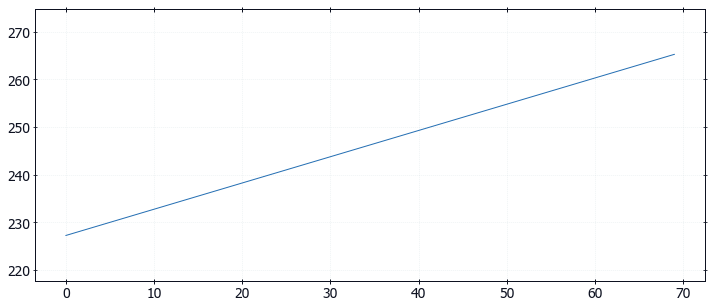

In [87]:
poly.plot(figsize=(12,5), ylim=(0,None))

In [16]:
pd.Series()

In [19]:
x[0]

3

In [11]:
series.blue.index.groupby(level=['week']).sum().blue.pattern.polynomial(shape=3).p_value

0.08262641882214622

In [5]:
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

TypeError: plot got an unexpected keyword argument 'x'

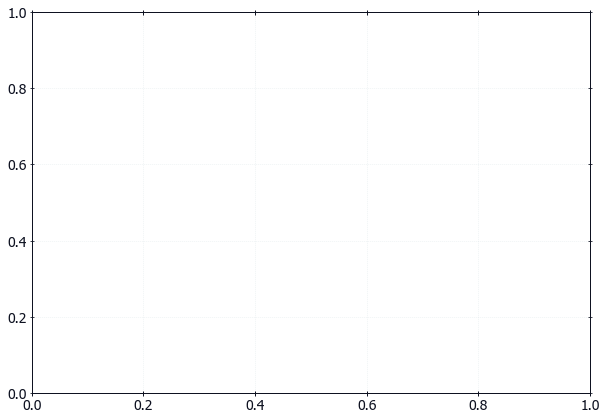

In [8]:
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x=x, y=y, c='ro', ms=5)
spl = UnivariateSpline(x, y, s=0.5)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)
plt.show()

In [126]:
spl = UnivariateSpline(range(0, series.dropna().size), series.dropna().values, k=3, s=0.5)

In [127]:
x = np.linspace(0, series.dropna().size - 1, 1000)

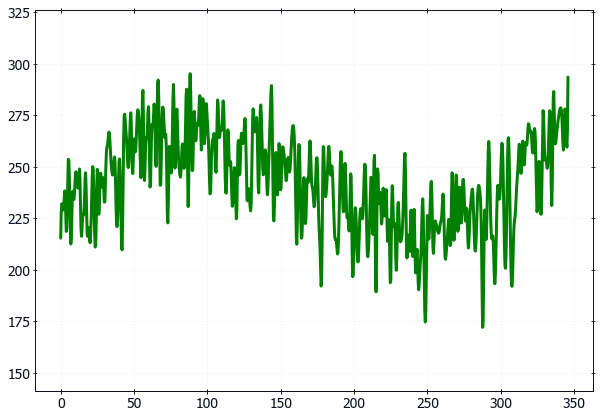

In [128]:
plt.plot(x, spl(x), 'g', lw=3)
plt.show()

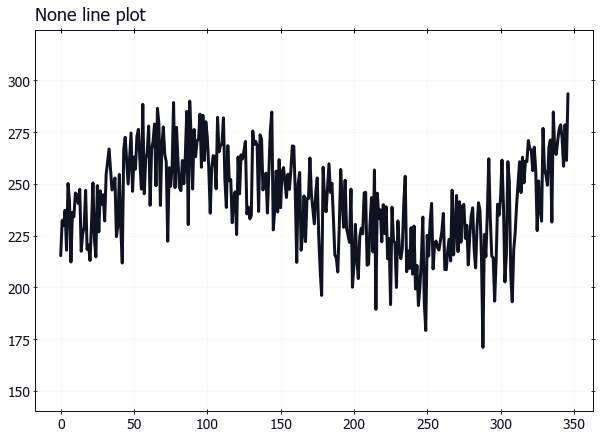

In [65]:
pd.Series(index=x, ).blue.line()

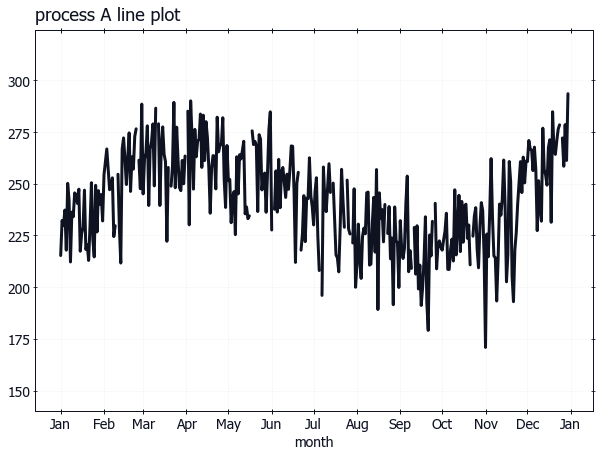

In [48]:
series.blue.line()

In [9]:
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

In [10]:
y

array([[1, 1, 2, 3, 5],
       [0, 4, 2, 6, 8],
       [1, 3, 5, 7, 9]])

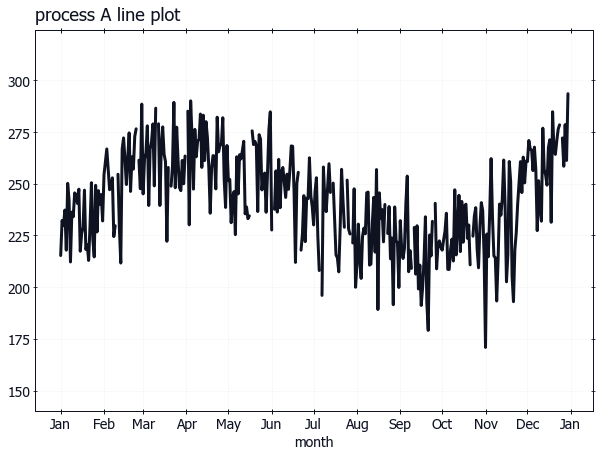

In [14]:
series.blue.line()

In [68]:
series.index.to_frame(index=False).to_dict()

{0: {0: Timestamp('2021-01-04 00:00:00'),
  1: Timestamp('2021-01-05 00:00:00'),
  2: Timestamp('2021-01-06 00:00:00'),
  3: Timestamp('2021-01-07 00:00:00'),
  4: Timestamp('2021-01-08 00:00:00'),
  5: Timestamp('2021-01-09 00:00:00'),
  6: Timestamp('2021-01-10 00:00:00'),
  7: Timestamp('2021-01-11 00:00:00'),
  8: Timestamp('2021-01-12 00:00:00'),
  9: Timestamp('2021-01-13 00:00:00'),
  10: Timestamp('2021-01-14 00:00:00'),
  11: Timestamp('2021-01-15 00:00:00'),
  12: Timestamp('2021-01-16 00:00:00'),
  13: Timestamp('2021-01-17 00:00:00'),
  14: Timestamp('2021-01-18 00:00:00'),
  15: Timestamp('2021-01-19 00:00:00'),
  16: Timestamp('2021-01-20 00:00:00'),
  17: Timestamp('2021-01-21 00:00:00'),
  18: Timestamp('2021-01-22 00:00:00'),
  19: Timestamp('2021-01-23 00:00:00'),
  20: Timestamp('2021-01-24 00:00:00'),
  21: Timestamp('2021-01-25 00:00:00'),
  22: Timestamp('2021-01-26 00:00:00'),
  23: Timestamp('2021-01-27 00:00:00'),
  24: Timestamp('2021-01-28 00:00:00'),
  25: T

In [43]:
_levels = ['day', 'month']
_s = 5
_dict = {}
_default_dict = {
    'year': {key: datetime.datetime.now().year for key in range(_s)},
    'month': {key: 1 for key in range(_s)},
    'day': {key: 1 for key in range(_s)},
    'hour': {key: 0 for key in range(_s)},
    'minute': {key: 0 for key in range(_s)},
    'second': {key: 0 for key in range(_s)},
}
_levels = _default_dict.keys()

In [44]:
for level, data in _default_dict.items():
    if level in _levels:
        _dict[level] = _dict.get(level, _default_dict[level])

In [45]:
_dict

{'year': {0: 2022, 1: 2022, 2: 2022, 3: 2022, 4: 2022},
 'month': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 'day': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1},
 'hour': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'minute': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'second': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}}

In [51]:
all([item in _dict for item in ['year', 'month', 'week']])

False

In [71]:
index = series.index
_index = np.array([d.timestamp() for d in index], dtype='int')
#_index = _index - _index.min()
#_index = _index / np.gcd.reduce(_index)
#_index
np.gcd.reduce(_index)

86400

In [ ]:
_resolution = {
    86400: 'day',
    3600: 'hour',
    60: 'minutes',
    1: 'seconds',
}